# Feature Guide: Using Builtin Collections

---

![created-tag](https://img.shields.io/static/v1?label="Created%20"&message="Aug30,2023"&color="blueviolet")

<div class="container">
  <div class="image">
    <img src="http://www.nasa.gov/sites/default/files/thumbnails/image/coma.jpg" alt="Coma Cluster Image" width=400 style="float:right"/>
  </div>
  <div class="text">
    <p>
  In practice, its often useful to replicate known galaxy clusters in simulation contexts. Not only is it important to replicate the observed features of real galaxy clusters in your initial conditions, but its also often a point of scientific inquiry to study the simulated properties of galaxy clusters that are already well described. To assist users in generating replica clusters from known observations, we have included a module (<b>cluster_module.collection</b>), which allows the user to access entire datasets worth of galaxy cluster fits and to generate models directly from those fits.

  In this guide, we will describe how to interact with ``Collections``, how to generate your own, and how to contribute your collections to the collective library included in this code.
  
  </p>
  </div>
</div>

<br>
<br>

---

## Contents

- [What are Collections?](#What-Are-Collections)
- [How do I Access One?](#How-Do-I-Access-One?)
    - [Getting Technical](#Getting-Technical)   
- [How do I Build One?](#How-Do-I-Build-One?) 
---

## What Are Collections

As described briefly above, collections are datasets of known clusters with observationally confirmed fits for various radial profiles. In the ``cluster_generator`` library, collections are essentially wrappers for individual sets of radial profile parameters for a group of galaxy clusters. Generally, these are sorted by the name of the paper in which they were first presented. Let's look at an example to see how this works. To see all of the built-in options available, you can use

In [1]:
import cluster_generator as cg
from cluster_generator.collection import get_collections

for k in cg.collection.get_collections():
    print(k[0])
    print("------------------------------------------------------")
    print(k[1])

Vikhlinin et. al. 2006
------------------------------------------------------
This dataset contains fits to CHANDRA data from the paper by Vikhlinin et. al. 2006: 2006ApJ...640..691V.


---

As you can see, currently ``cluster_generator`` only includes a single collection. Hopefully this changes soon as we get more datasets to include, but for now we only need one to provide an example. 

So we know that we want to use this dataset. To load the collection, we do the following

In [2]:
from cluster_generator.collection import Vikhlinin06

v = Vikhlinin06.load()

cluster_generator : [INFO     ] 2023-08-30 14:29:28,384 Loaded Vikhlinin et. al. 2006.


Once the ``Collection`` is loaded, we can start accessing the data. Let's start by looking at all of the galaxy clusters that appear in our dataset:

In [3]:
print(f"# ----- Available Clusters in {v.name} ----- #")
for i,n in enumerate(v.names):
    print(f"#{i+1} {n}")

# ----- Available Clusters in Vikhlinin et. al. 2006 ----- #
#1 A133
#2 A262
#3 A383
#4 A478
#5 A907
#6 A1413
#7 A1795
#8 A1991
#9 A2029
#10 A2390
#11 RX J1159+5531
#12 MKW 4
#13 USGC S152


Each one of these galaxy clusters has matching parameters and profiles from which we can build a model. To see how this all works, let's explore a bit more of ``v``'s behavior. We can see the attributes of the object using its ``.name``,``.description``, and ``.load_method`` attributes. This contains a lot of backend data for the initialization process, but some of it is interesting:

In [4]:
for attr in ["name", "description", "load_method"]:
    print(f"{attr} = {getattr(v,attr)}\n")

name = Vikhlinin et. al. 2006

description = This dataset contains fits to CHANDRA data from the paper by Vikhlinin et. al. 2006: 2006ApJ...640..691V.


load_method = from_dens_and_temp


The ``name`` and ``description`` attributes are pretty self-evident, but what is ``load_method``? The ``load_method`` is the method (attached to the ``ClusterModel`` class) which is used to initialize the clusters in the dataset as we will now do.

---

## How Do I Access One?

---

Okay, so we've seen the ins and outs of what ``v`` is, but how do I make my beautiful cluster???

Let's start by looking at the individual clusters included in ``v``. Each one has an entry in ``v.objs`` which contains the fit parameters for the profile objects in ``v.profiles``. We can look at the parameters with

In [5]:
from pprint import pprint
for cluster in v.names[:3]:
    print(f"The parameters for {cluster} are")
    pprint(v.objs[cluster])
    

The parameters for A133 are
{'Name': 'A133',
 'T0': 3.61,
 'Tmin': 0.9747,
 'a': 0.12,
 'a_cool': 3.88,
 'alpha': 0.916,
 'b': 5.0,
 'beta': 0.526,
 'c': 10.0,
 'epsilon': 4.943,
 'gamma': 3,
 'r_c': 94.6,
 'r_cool': 57,
 'r_det': 1100,
 'r_min': 40,
 'r_s': 1239.9,
 'rho_0': 188839,
 'rt': 1420,
 'z': 0.0569}
The parameters for A262 are
{'Name': 'A262',
 'T0': 2.42,
 'Tmin': 1.5488,
 'a': -0.02,
 'a_cool': 5.25,
 'alpha': 1.712,
 'b': 5.0,
 'beta': 0.345,
 'c': 1.1,
 'epsilon': 1.76,
 'gamma': 3,
 'r_c': 70.7,
 'r_cool': 19,
 'r_det': 450,
 'r_min': 10,
 'r_s': 365.6,
 'rho_0': 91429,
 'rt': 350,
 'z': 0.0162}
The parameters for A383 are
{'Name': 'A383',
 'T0': 8.78,
 'Tmin': 6.585,
 'a': -0.14,
 'a_cool': 6.17,
 'alpha': 2.013,
 'b': 1.44,
 'beta': 0.577,
 'c': 8.0,
 'epsilon': 0.767,
 'gamma': 3,
 'r_c': 112.1,
 'r_cool': 81,
 'r_det': 800,
 'r_min': 25,
 'r_s': 408.7,
 'rho_0': 290021,
 'rt': 3030,
 'z': 0.1883}


---

As you can see, each element in the ``v.objs`` are all dictionaries of parameters. We can turn these into the corresponding cluster models using the following:


In [6]:
model = v.load_model("A1991")

cluster_generator : [INFO     ] 2023-08-30 14:29:28,799 Constructing ClusterModel. Method='from_dens_and_temp', gravity=Newtonian.
✔ cluster_generator : [INFO     ] Wed Aug 30 14:29:29 2023 Dyn. Mass comp; (...)⠙ cluster_generator : [INFO     ] Wed Aug 30 14:29:29 2023 Dyn. Mass comp; (...) cluster_generator : [INFO     ] Wed Aug 30 14:29:29 2023 Dyn. Mass comp: [DONE]
cluster_generator : [INFO     ] 2023-08-30 14:29:29,392 ClusterModel [ClusterModel object; gravity=Newtonian] has no virialization method. Setting to default = eddington
cluster_generator : [INFO     ] 2023-08-30 14:29:29,394 Computing gravitational potential of ClusterModel object; gravity=Newtonian. gravity=Newtonian.


So now we've actually got the cluster loaded! We can do any number of things with if, but let's start by looking at the temperature and density profiles:

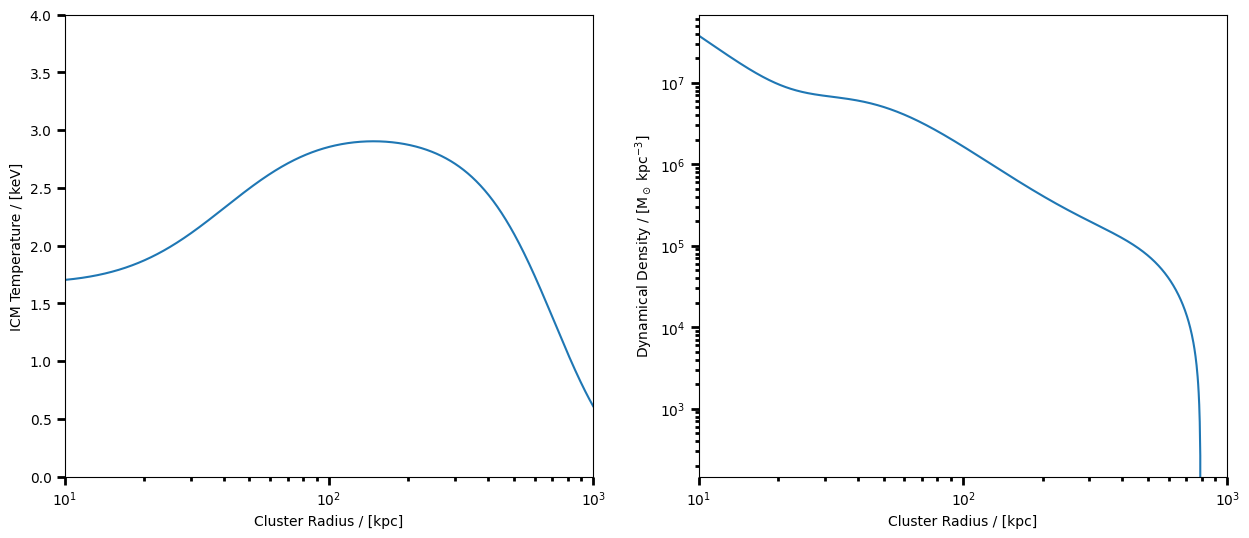

In [7]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2,figsize=(15,6))
model.plot("temperature",fig=fig,ax=ax[0])
ax[0].set_yscale("linear")
ax[0].set_ylim([0,4])
ax[0].set_xlim([10,1000])
ax[0].set_ylabel("ICM Temperature / [keV]")
ax[0].set_xlabel("Cluster Radius / [kpc]")

model.plot("total_density",fig=fig,ax=ax[1])
ax[1].set_xlim([10,1000])
ax[1].set_ylabel(r"Dynamical Density / [$\mathrm{M_\odot \; kpc^{-3}}$]")
ax[1].set_xlabel("Cluster Radius / [kpc]")

plt.show()

For the fun of it, let's go through the process of actually producing these initial conditions:

In [8]:
# -- saving the model to file -- #
model.write_model_to_h5("collections_model.h5",overwrite=True)

ics = cg.ics.ClusterICs(
    "Collections_Example",
    1,
    ["collections_model.h5"],
    [[0,0,0]],
    [[0,0,0]],
    num_particles={"dm":1_000_000,"gas":1_000_000})

parts = ics.setup_particle_ics()

cluster_generator : [INFO     ] 2023-08-30 14:29:34,109 Loading ClusterModel instance from collections_model.h5.
cluster_generator : [INFO     ] 2023-08-30 14:29:34,142 Loading ClusterModel instance from collections_model.h5.
cluster_generator : [INFO     ] 2023-08-30 14:29:34,167 Loading ClusterModel instance from collections_model.h5.


Computing particle DF (Eddington) :   0%|          | 0/1000 [00:00<?, ?it/s]

cluster_generator : [INFO     ] 2023-08-30 14:29:38,109 We will be assigning 1000000 dark_matter particles.
cluster_generator : [INFO     ] 2023-08-30 14:29:38,112 Compute 1000000 particle positions.
cluster_generator : [INFO     ] 2023-08-30 14:29:38,652 Computing dark_matter velocities using eddington method.


Generating particle velocities [Eddington]:   0%|          | 0/1000000 [00:00<?, ?it/s]

cluster_generator : [INFO     ] 2023-08-30 14:29:45,211 We will be assigning 1000000 particles.
cluster_generator : [INFO     ] 2023-08-30 14:29:45,212 	Computing particle positions...
cluster_generator : [INFO     ] 2023-08-30 14:29:45,426 Computing particle thermal energies, densities, and masses.
cluster_generator : [INFO     ] 2023-08-30 14:29:45,758 Set particle velocities to zero.
cluster_generator : [INFO     ] 2023-08-30 14:29:47,825 Concatenating 1 clusters.


In [9]:
import yt

parts.make_radial_cut(2000)
parts.add_offsets([2000,2000,2000],[0,0,0])


yt : [INFO     ] 2023-08-30 14:29:51,511 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-08-30 14:29:51,515 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-08-30 14:29:51,519 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-08-30 14:29:51,522 Parameters: domain_right_edge         = [4000. 4000. 4000.]
yt : [INFO     ] 2023-08-30 14:29:51,525 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-08-30 14:29:51,528 Allocating for 2e+06 particles
yt : [INFO     ] 2023-08-30 14:29:53,272 xlim = 0.000000 4000.000000
yt : [INFO     ] 2023-08-30 14:29:53,277 ylim = 0.000000 4000.000000
yt : [INFO     ] 2023-08-30 14:29:53,283 xlim = 0.000000 4000.000000
yt : [INFO     ] 2023-08-30 14:29:53,285 ylim = 0.000000 4000.000000
yt : [INFO     ] 2023-08-30 14:29:53,298 Splatting (('gas', 'thermal_energy')) onto a 800 by 800 mesh using method 'ngp'



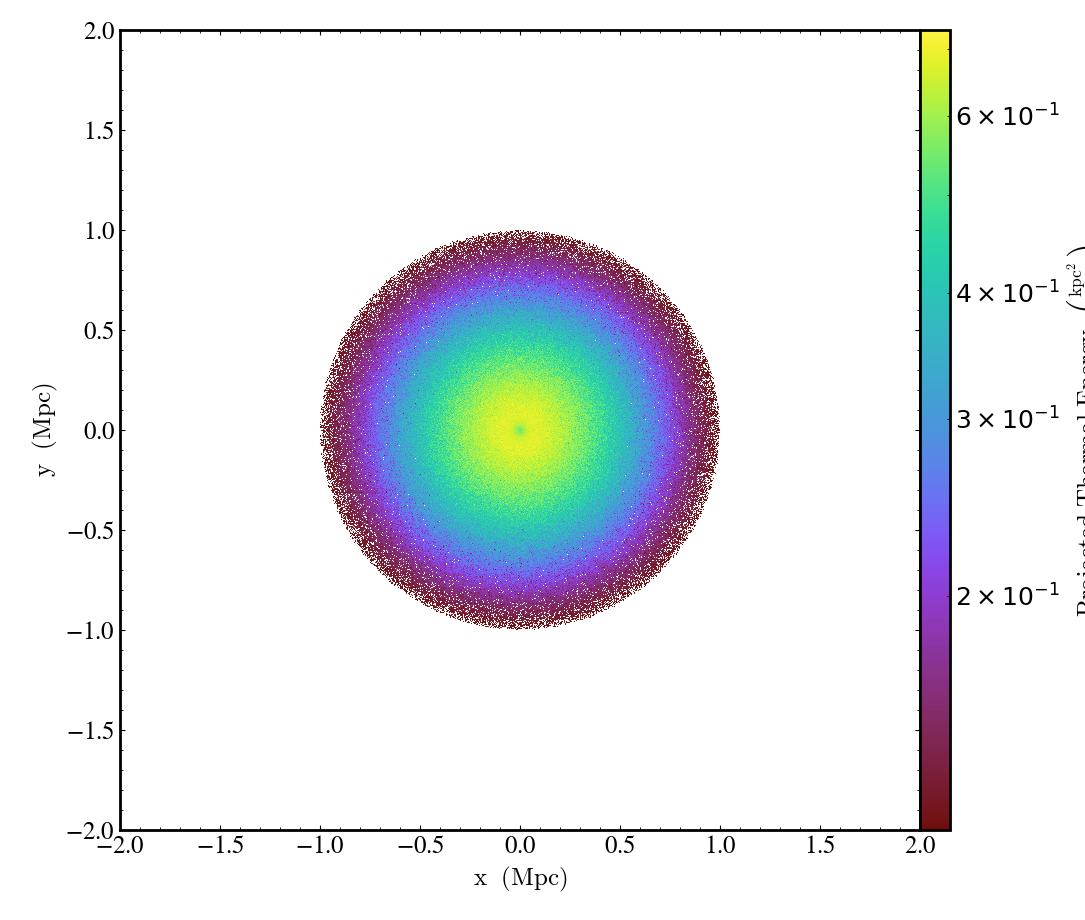

In [10]:

ds = parts.to_yt_dataset(4000)
p = yt.ParticlePlot(ds,("gas","particle_position_x"),("gas","particle_position_y"),("gas","thermal_energy"),weight_field=("gas","particle_mass"))
p.show()

---

### Getting Technical

Okay, so we've done a lot with ``Collection`` objects already, but there are a few advanced topics worth discussing in order to be prepared for the use of these collections in a scientific context.

1. **Radial Cuts**

Let's take a look at our model again:

In [11]:
import numpy as np
print(f"The maximal radius is {np.amax(model['radius'])} and minimal radius is {np.amin(model['radius'])}.")

The maximal radius is 1000.0 kpc and minimal radius is 10.0 kpc.


<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Info</b><br>
    <p style="color: black">
        Notice that the galaxy cluster is truncated at relatively small radii from the center and that within the inner-most bins we are also missing any model fit. This will impact the ouput quality!
    </p>
<div>

So what do we do? Well, we can get a bit better by chaning the parameters we use in the ``v.load_model`` method:

In [12]:
model = v.load_model("A2390",r_min=0.01,r_max=8000)

cluster_generator : [INFO     ] 2023-08-30 14:29:56,862 Constructing ClusterModel. Method='from_dens_and_temp', gravity=Newtonian.
✔ cluster_generator : [INFO     ] Wed Aug 30 14:29:57 2023 Dyn. Mass comp; (...)⠙ cluster_generator : [INFO     ] Wed Aug 30 14:29:57 2023 Dyn. Mass comp; (...) cluster_generator : [INFO     ] Wed Aug 30 14:29:57 2023 Dyn. Mass comp: [DONE]
cluster_generator : [INFO     ] 2023-08-30 14:29:57,405 ClusterModel [ClusterModel object; gravity=Newtonian] has no virialization method. Setting to default = eddington
cluster_generator : [INFO     ] 2023-08-30 14:29:57,407 Computing gravitational potential of ClusterModel object; gravity=Newtonian. gravity=Newtonian.
/home/ediggins/cluster_generator/cluster_generator/utils.py:198: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  ret[i] = quad(profile, r, rmax)[0]


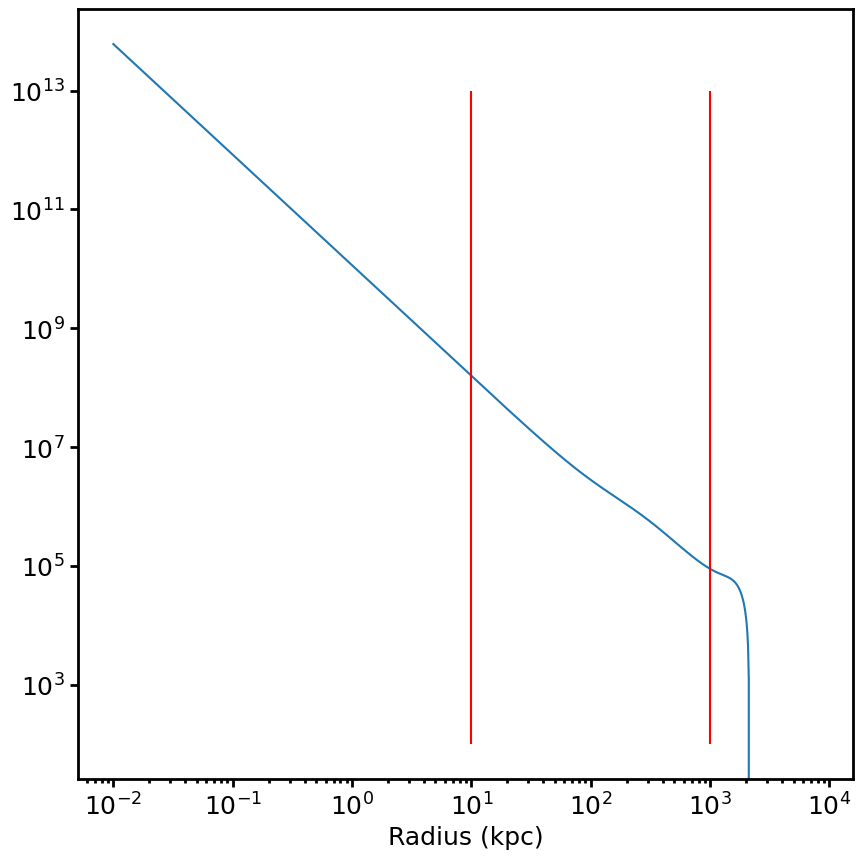

✖ cluster_generator : [INFO     ] Wed Aug 30 14:30:02 2023 Checking physicality ⠙ luster_generator : [INFO     ] Wed Aug 30 14:30:02 2023 Checking physicality o [ClusterModel object; gravity=Newtonian] is non-physical over 9.9% of domain.


In [13]:
model.plot("total_density")
plt.vlines(ymin=1e2,ymax=1e13,x=[10,1000],color="red")
plt.show()

_ = model.is_physical()

<div class="alert alert-block alert-danger">
     <b><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Info</b><br>
     <p>
     Notice that the profile behaves weirdly outside of its modeled range! This is because (for this particular dataset), the best fit process was limited to the described range and the functions were never intended to behave physically outside of
     that domain.
      </p>
      </div>

**How do we fix this problem?** 

For the majority of built-in collections (see the API reference for details on implementation), you can use the ``force_fix=True`` tag to artificially alter the behavior of the density profile at large radii. The ``force_radius`` kwarg is used to specific the point at which to mirror the slope. The way this works is that beyond ``force_radius``, the density profile is <u>forced</u> to be self consistent by transitioning to a power law profile with the same slope as occurs at ``force_radius``.


In [14]:
model_fixed = v.load_model("A2390",r_min=0.01,r_max=8000)
model_fixed = model_fixed.rebuild_physical()

cluster_generator : [INFO     ] 2023-08-30 14:30:02,803 Constructing ClusterModel. Method='from_dens_and_temp', gravity=Newtonian.
✔ cluster_generator : [INFO     ] Wed Aug 30 14:30:03 2023 Dyn. Mass comp; (...)⠙ cluster_generator : [INFO     ] Wed Aug 30 14:30:03 2023 Dyn. Mass comp; (...) cluster_generator : [INFO     ] Wed Aug 30 14:30:03 2023 Dyn. Mass comp: [DONE]
cluster_generator : [INFO     ] 2023-08-30 14:30:03,338 ClusterModel [ClusterModel object; gravity=Newtonian] has no virialization method. Setting to default = eddington
cluster_generator : [INFO     ] 2023-08-30 14:30:03,339 Computing gravitational potential of ClusterModel object; gravity=Newtonian. gravity=Newtonian.
✖⠋cluster_generator : [INFO     ] Wed Aug 30 14:30:07 2023 Rebuilding ClusterMod cluster_generator : [INFO     ] Wed Aug 30 14:30:07 2023 Checking physicality  luster_generator : [INFO     ] Wed Aug 30 14:30:07 2023 Rebuilding ClusterMode⠙ luster_generator : [INFO     ] Wed Aug 30 14:30:07 2023 Checking p

✔ cluster_generator : [INFO     ] Wed Aug 30 14:30:19 2023 Checking physicality ⠙ luster_generator : [INFO     ] Wed Aug 30 14:30:19 2023 Checking physicality o ClusterModel object; gravity=Newtonian is physical.


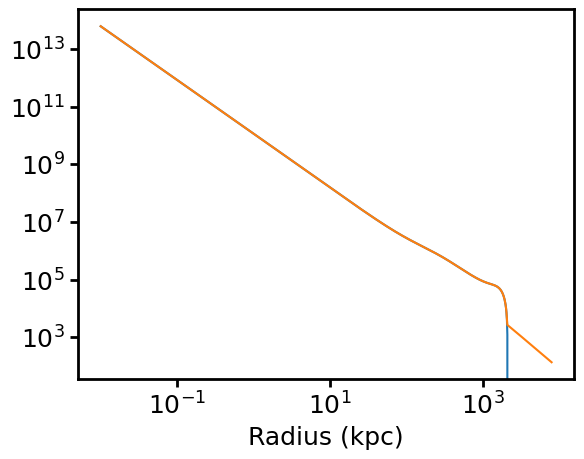

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
model.plot("total_density",fig=fig,ax=ax)
model_fixed.plot("total_density",fig=fig,ax=ax)


_ = model_fixed.is_physical()

Its not a pretty solution, but its very difficult to make a sensible choice for making any profile become physical. Nonetheless, we can now generate the initial conditions again without the restriction of size. It should be noted that in almost all cases, the behavior in the far reaches of the cluster is negligible anyways.

In [34]:

model_fixed.write_model_to_h5("collections_model.h5",overwrite=True)

ics = cg.ics.ClusterICs(
    "Collections_Example",
    1,
    ["collections_model.h5"],
    [[0,0,0]],
    [[0,0,0]],
    num_particles={"dm":1_000_000,"gas":1_000_000})

parts = ics.setup_particle_ics()

cluster_generator : [INFO     ] 2023-08-30 14:46:25,968 Loading ClusterModel instance from collections_model.h5.
cluster_generator : [INFO     ] 2023-08-30 14:46:26,088 Loading ClusterModel instance from collections_model.h5.
cluster_generator : [INFO     ] 2023-08-30 14:46:26,149 Loading ClusterModel instance from collections_model.h5.


Computing particle DF (Eddington) :   0%|          | 0/1000 [00:00<?, ?it/s]

cluster_generator : [INFO     ] 2023-08-30 14:46:30,229 We will be assigning 1000000 dark_matter particles.
cluster_generator : [INFO     ] 2023-08-30 14:46:30,231 Compute 1000000 particle positions.
cluster_generator : [INFO     ] 2023-08-30 14:46:31,336 Computing dark_matter velocities using eddington method.


Generating particle velocities [Eddington]:   0%|          | 0/1000000 [00:00<?, ?it/s]

cluster_generator : [INFO     ] 2023-08-30 14:46:48,208 We will be assigning 1000000 particles.
cluster_generator : [INFO     ] 2023-08-30 14:46:48,211 	Computing particle positions...
cluster_generator : [INFO     ] 2023-08-30 14:46:50,106 Computing particle thermal energies, densities, and masses.
cluster_generator : [INFO     ] 2023-08-30 14:46:50,310 Set particle velocities to zero.
cluster_generator : [INFO     ] 2023-08-30 14:46:57,800 Concatenating 1 clusters.


yt : [INFO     ] 2023-08-30 14:47:01,436 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-08-30 14:47:01,446 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-08-30 14:47:01,464 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-08-30 14:47:01,468 Parameters: domain_right_edge         = [10000. 10000. 10000.]
yt : [INFO     ] 2023-08-30 14:47:01,475 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-08-30 14:47:01,538 Allocating for 1.665e+06 particles
yt : [INFO     ] 2023-08-30 14:47:03,961 xlim = 0.000000 10000.000000
yt : [INFO     ] 2023-08-30 14:47:03,964 ylim = 0.000000 10000.000000
yt : [INFO     ] 2023-08-30 14:47:03,973 xlim = 0.000000 10000.000000
yt : [INFO     ] 2023-08-30 14:47:03,976 ylim = 0.000000 10000.000000
yt : [INFO     ] 2023-08-30 14:47:04,007 Splatting (('gas', 'thermal_energy')) onto a 800 by 800 mesh using method 'ngp'



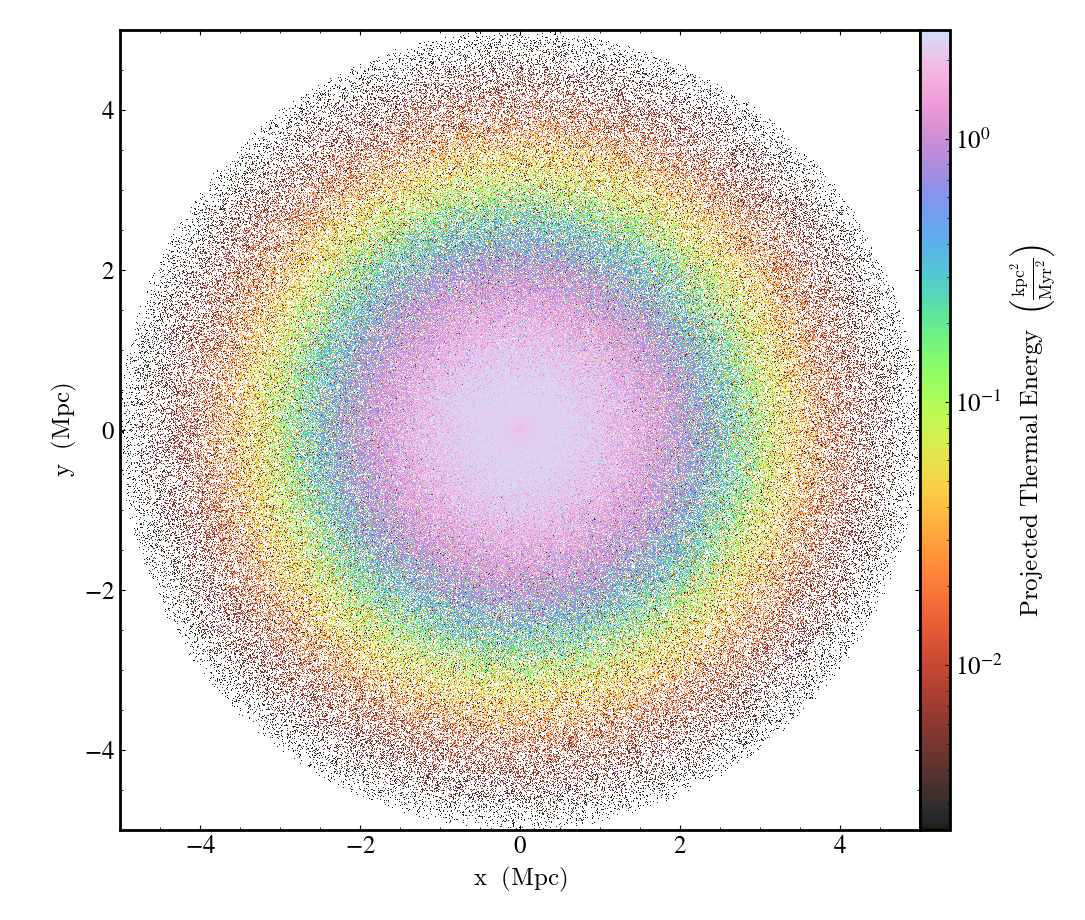

In [35]:
import yt

parts.make_radial_cut(5000)
parts.add_offsets([5000, 5000, 5000], [0, 0, 0])

ds = parts.to_yt_dataset(10000)
p = yt.ParticlePlot(ds, ("gas", "particle_position_x"), ("gas", "particle_position_y"), ("gas", "thermal_energy"),
                    weight_field=("gas", "particle_mass"))
p.set_cmap(("gas","thermal_energy"),"kamae")
p.show()


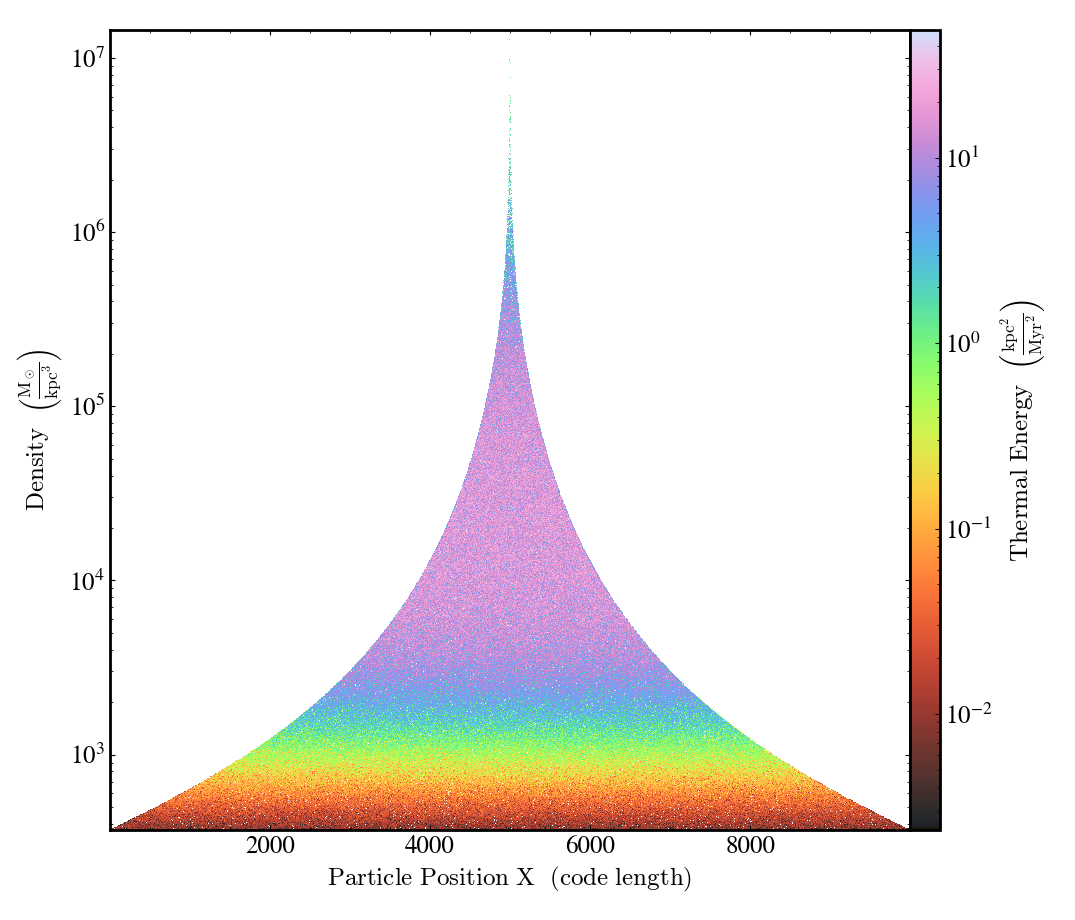

In [36]:

p = yt.ParticlePhasePlot(ds,("gas","particle_position_x"),("gas","density"),("gas","thermal_energy"),weight_field=None)
p.set_cmap(("gas","thermal_energy"),"kamae")
p.show()